# Week 10 Lab: Grouping Data
The data for today's lab session came from the [ONS Consumer Price Index (CPIH)](https://www.ons.gov.uk/datasets/cpih01/editions/time-series/versions/63):

> The Consumer Prices Index including owner occupiers’ housing costs (CPIH) and Consumer Prices Index (CPI) are consumer inflation or pure price indices defined as an average measure of change in the prices of goods and services bought within the domestic territory for consumption by households in the UK and foreign visitors to the UK. 
>  - average measure: a single figure that combines, or averages, all the price changes covered 
>  - change: its purpose is to measure how prices change over time rather than the absolute level of prices at a point in time

In this dataset, changes in prices are measured over time. The unit of measurement used in the `cpih` column is the percentage of change from the index value for the same category in 2015.


## CPIH Categories
The aggregate id (or [COICOP](https://en.wikipedia.org/wiki/Classification_of_Individual_Consumption_According_to_Purpose)) of each category of the CPI figure follows a hierarchical structure like the following diagram from the ONS Technical Manual which demonstrates how the prices of apples are aggregated into different categories used in the dataset:




Have a look at the [methodology](https://www.ons.gov.uk/economy/inflationandpriceindices/methodologies/consumerpriceinflationincludesall3indicescpihcpiandrpiqmi) for the CPIH measure of inflation before you contintue so that you can understand how to use the data. You can also read the [technical manual](https://www.ons.gov.uk/economy/inflationandpriceindices/methodologies/consumerpricesindicestechnicalmanual2019) to learn more about how the ONS measures inflation.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Start by importing `cpi-time-series-63.csv`

In [14]:
dataSource = pd.read_csv("cpi-time-series-63.csv")
dataSource.head()

,yyyy-mm,aggregate,cpih
0,2015-01,"05 Furniture, household equipment and maintenance",98.7
1,2015-01,Overall Index,99.2
2,2015-01,"04 Housing, water, electricity, gas and other ...",99.4
3,2015-01,11 Restaurants and hotels,98.9
4,2015-01,09 Recreation and culture,99.5


## Grouping
Use a `groupby` to calculate the mean value of the `cpih` column for each aggregate in the dataset

In [18]:
dataSource.groupby("aggregate")["cpih"].mean()

aggregate
01 Food and non-alcoholic beverages                    111.774837
02 Alcoholic beverages and tobacco                     120.514419
03 Clothing and footwear                               106.587411
04 Housing, water, electricity, gas and other fuels    113.722473
05 Furniture, household equipment and maintenance      110.973597
06 Health                                              114.760062
07 Transport                                           117.672388
08 Communication                                       115.123512
09 Recreation and culture                              112.671264
10 Education                                           119.439047
11 Restaurants and hotels                              118.714736
12 Miscellaneous goods and services                    107.848302
Overall Index                                          113.844822
Name: cpih, dtype: float64

## Pivoting
Plots with multiple lines are created using the wide-data format, each individual variable you want to plot should be on a seperate column.

 - Use a `pivot()` to convert the DataFrame from long to wide format. 
   - Use the `"aggregate"` column for the `columns` attribute 
   - Set the `"yyyy-mm"` column as the `index` attribute
   - Se the `values` attribute as `"cpih"`
   - Assign the name `wide` to this pivoted DataFrame.

In [25]:
wide = dataSource.pivot(
    index = "yyyy-mm",
    columns = "aggregate",
    values = "cpih"
)

Plot all of the columns as a line chart.
- Hint: set the `legend` attribute to `False`
- Remember that the index starts with 2015 values at `100`

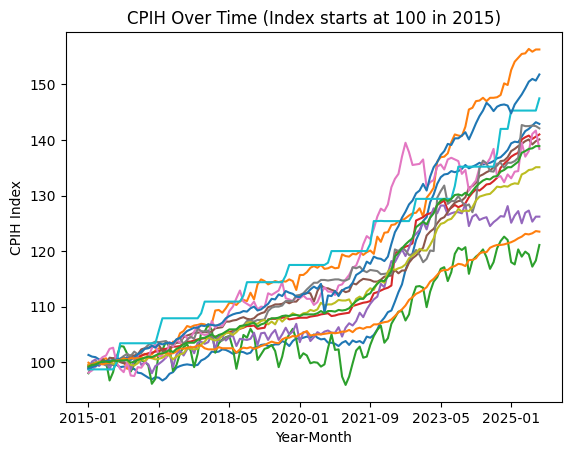

In [26]:
import matplotlib.pyplot as plt

wide.plot(legend=False)
plt.title("CPIH Over Time (Index starts at 100 in 2015)")
plt.xlabel("Year-Month")
plt.ylabel("CPIH Index")
plt.show()


It might be more useful to select some of the data that you can compare. Select the `Overall Index` and `04 Housing, water, electricity, gas and other fuels` and create a line plot comaring the two

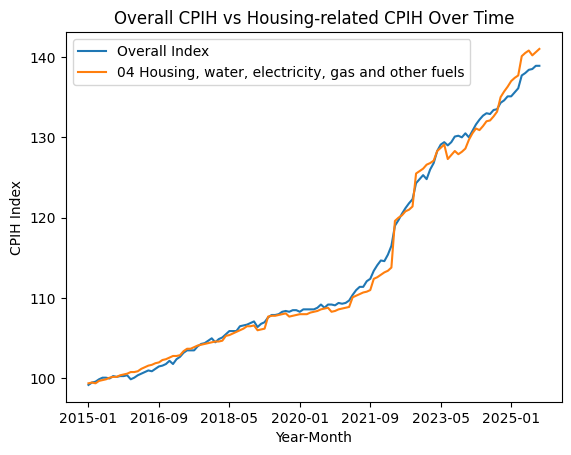

In [27]:
import matplotlib.pyplot as plt

# Select the two relevant CPIH categories
subset = wide[["Overall Index", "04 Housing, water, electricity, gas and other fuels"]]

# Plot the two series
subset.plot()
plt.title("Overall CPIH vs Housing-related CPIH Over Time")
plt.xlabel("Year-Month")
plt.ylabel("CPIH Index")
plt.legend()   # keep legend ON this time so you can compare the lines
plt.show()


## Aggregating
To calculate a yearly mean for the `Overall Index` category, we need to extract the year from the `yyyy-mm` column by extracting the first four characters. Use the code below to create `year` column in your DataFrame.

In [34]:
wide["year"] = wide.index.str[:4]
wide.groupby("year")["Overall Index"].mean()

dataSource["year"] = dataSource["yyyy-mm"].str[:4]

- Select the rows that match `"Overall Index"` from the `"Aggregate"` column
- Group the matching rows using the `"year"` column using a `groupby`
- Select the `"cpih"` column and calculate its mean
- Create a plot of the Series

In [38]:
overall = dataSource[dataSource["aggregate"] == "Overall Index"]
grouped = overall.groupby("year")
yearly_mean = grouped["cpih"].mean()

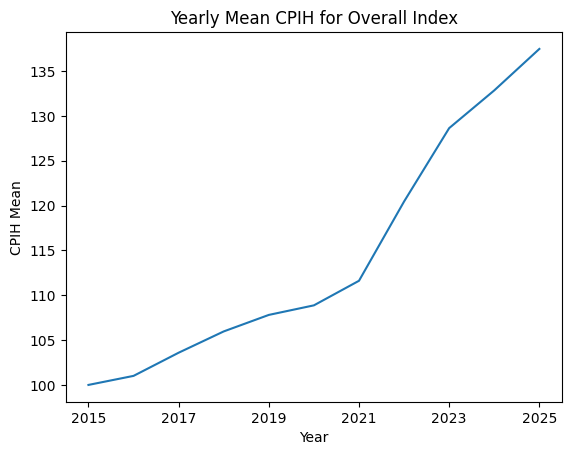

In [39]:
import matplotlib.pyplot as plt

yearly_mean.plot(kind="line")
plt.title("Yearly Mean CPIH for Overall Index")
plt.xlabel("Year")
plt.ylabel("CPIH Mean")
plt.show()


## Aggregating and Using a MultiIndex
Group the data by both the `year` column you created in the last exercise, and the `aggregate` column to calculate the mean of the `cpih` and assign it the name `grouped_means`.

In [41]:
grouped_means = dataSource.groupby(["year", "aggregate"])["cpih"].mean()

You can access the mean data for each year from the row index (ie `["2018"]` will return the means for the year `2018`).

- Subtract the data for the years `2024` and `2015` to show differences in the index
- Sort the values of the Series using `sort_values`
- Create a plot of the Series and set the `kind` of the plot to `barh`

In [42]:
mean_2024 = grouped_means["2024"]
mean_2015 = grouped_means["2015"]

diff = mean_2024 - mean_2015
diff_sorted = diff.sort_values()

diff_sorted.plot(kind = "barh", title="CPIH Change in 20